In [1]:
import pandas as pd 
import os
import seaborn as sns
import numpy as np
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:\\Users\\ryan\\downloads")

In [3]:
jobs = pd.read_csv("datafest2018-Updated-April121.csv")

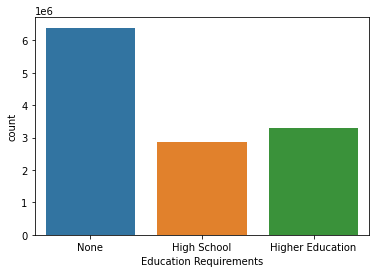

In [4]:
count_plot = sns.countplot(data=jobs, x="educationRequirements") #Creates a countplot of education requriements from the unsubsetted data
count_plot.set(xlabel = "Education Requirements");

In [5]:
jobs_new = jobs[jobs["city"] == "Los Angeles"] #Only select Los Angeles job postings
jobs_new = jobs_new.iloc[:,[6,7,13,14,17,18,19,20, 21]] #Selected potential columns of interest (dropped columns like business id and city)
jobs_new = jobs_new[jobs_new["estimatedSalary"] > 0] #Only select estimated salary greater than 0
jobs_new = jobs_new.dropna() #Dropped features with NA's 
jobs_new = jobs_new[jobs_new["educationRequirements"] != "None"] #Only selected jobs without 

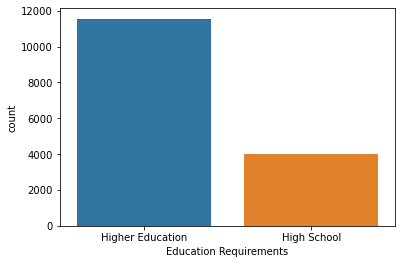

In [6]:
count_plot = sns.countplot(data=jobs_new, x="educationRequirements") #Creates a countplot of education requirements from subsetted data
count_plot.set(xlabel = "Education Requirements");

In [7]:
jobs_new_X = jobs_new[["avgOverallRating", "experienceRequired", "estimatedSalary", "supervisingJob", "licenseRequiredJob", "clicks", "numReviews", "jobAgeDays"]] #Seperates potential X features from y column
jobs_new_y = jobs_new["educationRequirements"]

In [8]:
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy="minority") 
jobs_over_X, jobs_over_y = oversample.fit_resample(jobs_new_X, jobs_new_y) #Applies over sampling to minority class from jobs_new_X and jobs_new_y
jobs_over_X["educationRequirements"] = jobs_over_y
jobs_over = jobs_over_X #Stiches the over sampled data into a new dataframe called jobs_over

[Text(0.5, 0, 'Education Requirements')]

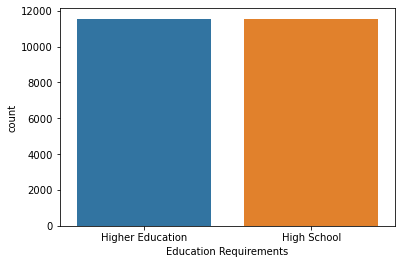

In [9]:
count_plot = sns.countplot(data=jobs_over, x="educationRequirements") #Creates a countplot of over sampled education requirements
count_plot.set(xlabel = "Education Requirements")

<AxesSubplot:xlabel='estimatedSalary', ylabel='educationRequirements'>

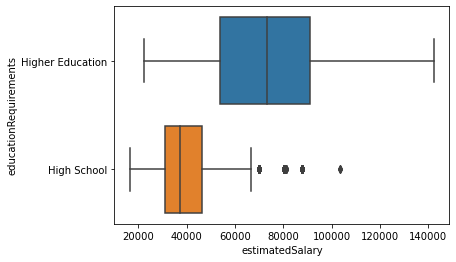

In [10]:
sns.boxplot(data=jobs_over, x="estimatedSalary", y="educationRequirements") #Boxplots of estimated salary sepearted by education requriements

<AxesSubplot:xlabel='experienceRequired', ylabel='educationRequirements'>

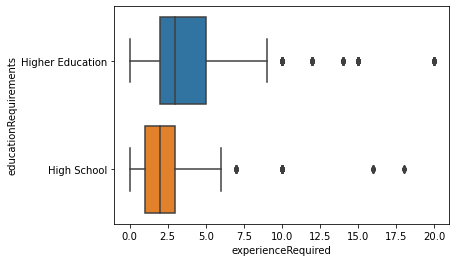

In [11]:
sns.boxplot(data=jobs_over, x="experienceRequired", y="educationRequirements") #Boxplots of experience requried (in years) sepearted by education requriements

<AxesSubplot:xlabel='avgOverallRating', ylabel='educationRequirements'>

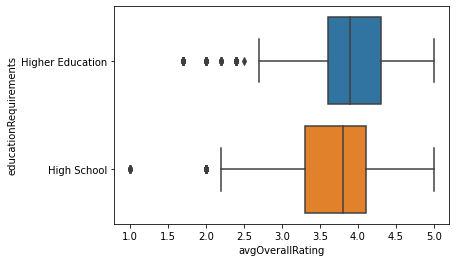

In [12]:
sns.boxplot(data=jobs_over, x="avgOverallRating", y="educationRequirements") #Boxplots of average overall rating sepearted by education requriements

<AxesSubplot:xlabel='numReviews', ylabel='educationRequirements'>

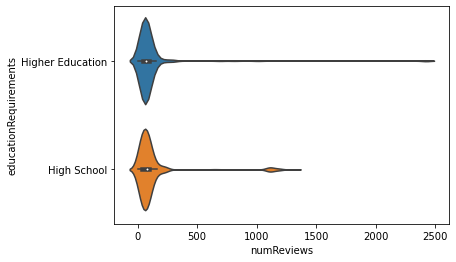

In [13]:
jobs_over = jobs_over[jobs_over["numReviews"] < 6500] #pulled out one outlier since it made violin plots unreadable 
sns.violinplot(data=jobs_over, x="numReviews", y="educationRequirements", showfliers = True) #Violin plots of number of reviews seperated by education requirements

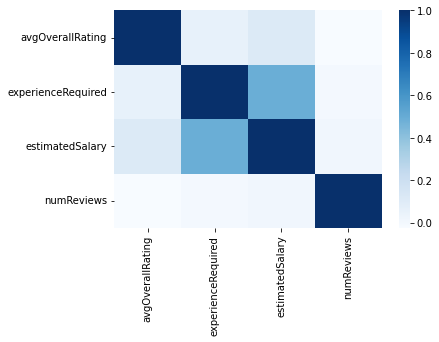

In [14]:
sns.heatmap(jobs_over[["avgOverallRating", "experienceRequired", "estimatedSalary", "numReviews"]].corr(), cmap = "Blues") #Feature correaltion heatmap
plt.show()

In [15]:
train, test = train_test_split(jobs_over, test_size=0.20, random_state=42) #Splits data into train and test splits

In [16]:
train_X = train.iloc[:,[0,1,2,6]] #Selects the columns of interest (from index) based on our EDA graphics for training
train_y = train.iloc[:,8] #Seperates y values for training
test_X = test.iloc[:,[0,1,2,6]]  #Selects the columns of interest (from index) based on our EDA graphics for training
test_y = test.iloc[:,8] #Seperates y values for training
train_X=(train_X-train_X.mean())/train_X.std() #standardizes train and test data
test_X =(test_X-test_X.mean())/test_X.std()

In [17]:
test_y = test_y.map({'Higher Education': 1, 'High School': 0}).astype(int) #Sets higher education to 1 and High school to 0
train_y = train_y.map({'Higher Education': 1, 'High School': 0}).astype(int)

In [18]:
clf = LogisticRegression(random_state=0).fit(train_X, train_y) #Constructs and fits the logistic regression model using training data
print("Training error:", clf.score(train_X, train_y)) #Training error
print("Cross validation error: ", cross_val_score(clf, train_X, train_y, cv = 3).mean()) #Cross valdiation error

Training error: 0.8100076477657598
Cross validation error:  0.8087512291052114


Testing Error:  0.8155997378195324


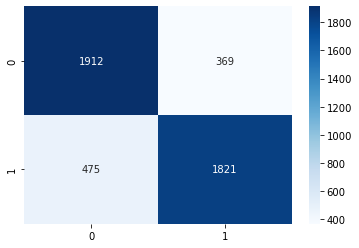

In [19]:
print("Testing Error: ", clf.score(test_X, test_y)) #testing error
cm = confusion_matrix(test_y, clf.predict(test_X), labels=[0, 1]) #Constructs confusion matrix for test data 
sns.heatmap(cm, annot=True, cmap = "Blues", fmt = ".0f"); #Uses confusion matrix to construct heat map 

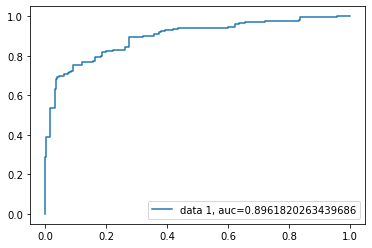

In [20]:
metrics.roc_curve(test_y, clf.predict(test_X))
import matplotlib.pyplot as plt
y_pred_proba = clf.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()